## Análisis - Bundesliga temporada 2015/2016 (masculina)

Vamos a hacer un análisis de las distintas competiciones (las cinco grandes ligas durante la temporada 2015-2016 y de todos los partidos en general) para poder entender que características son más importantes a la hora de tomar la decisión por parte del modelo de ML para decidir si el equipo va a ganar, perder o empatar el partido.

En este notebook en cuestión, vamos a analizar la Bundesliga en la temporada 2015/2016 (masculina).

Cargamos los datos de los partidos sobre la competición para entrenar el modelo y poder hacer el estudio de explicabilidad.

In [1]:
import os
import pandas as pd


competition_name = "1. Bundesliga"
competition_gender = "male"
season_name = "2015/2016"
season_name_for_filename = "2015_2016"

output_dir = "data/reduced/"
filename = f"{competition_name}({season_name_for_filename}_{competition_gender})_reduced.csv"
output_path = os.path.join(output_dir, filename)

if os.path.exists(output_path):
    print(f"Matches from the competition loaded from {output_path}")
    matches_in_Bundesliga = pd.read_csv(output_path)
else:
    print("You don't have data from the competition yet. Please run the notebook '0_datasets_building.ipynb' first.")

Matches from the competition loaded from data/reduced/1. Bundesliga(2015_2016_male)_reduced.csv


In [2]:
matches_in_Bundesliga.head(5)

,match_id,shots_on_target_ratio_home,shots_on_target_ratio_away,average_shots_on_target_distance_home,average_shots_on_target_distance_away,shots_inside_area_ratio_home,shots_inside_area_ratio_away,pass_success_ratio_home,pass_success_ratio_away,cross_success_ratio_home,...,percentage_shots_under_pressure_home,percentage_shots_inside_area_under_pressure_home,percentage_passes_under_pressure_home,percentage_passes_inside_area_under_pressure_home,percentage_set_piece_shots_home,percentage_set_piece_shots_inside_area_home,percentage_substitutions_home,percentage_tactical_substitutions_home,percentage_tactical_changes_home,percentage_formation_changes_home
0,3890267,0.375000,0.461538,16.622853,13.820947,0.750000,0.692308,0.832013,0.755051,0.250000,...,0.250000,0.400000,0.574713,0.50,0.266667,0.300000,0.5,0.5,0.500000,0.000000
1,3890265,0.150000,0.272727,20.255117,17.607160,0.500000,0.545455,0.772727,0.828261,0.318182,...,0.769231,0.750000,0.441718,0.75,0.680000,0.727273,0.5,0.5,0.500000,0.666667
2,3890264,0.133333,0.312500,26.271612,17.542449,0.333333,0.500000,0.767241,0.704301,0.200000,...,0.500000,0.400000,0.595376,1.00,0.476190,0.500000,0.5,0.6,0.333333,0.500000
3,3890263,0.272727,0.357143,18.619963,21.381858,0.454545,0.428571,0.688000,0.620690,0.214286,...,0.444444,0.571429,0.502924,0.50,0.458333,0.454545,0.5,0.5,1.000000,1.000000
4,3890262,0.272727,0.357143,20.860604,15.628223,0.818182,0.428571,0.490909,0.657431,0.300000,...,0.222222,0.250000,0.375000,0.60,0.400000,0.600000,0.5,0.5,0.200000,0.000000


Una vez ya tenemos los datos cargados, entrenamos el mejor modelo (seleccionado tras la experimentación) y mostramos sus resultados.

In [3]:
from src.analysis import bundesliga_best_model

best_model_Bundesliga, evaluation_metrics, X_train_Bundesliga, X_test_Bundesliga, encoder_Bundesliga, match_ids_test = bundesliga_best_model(matches_in_Bundesliga)
print(f"The best model for Bundesliga is {best_model_Bundesliga}")
print(f"The evaluation metrics for the best model are:")
evaluation_metrics.head()

The best model for Bundesliga is RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, max_features=None, n_estimators=11,
                       random_state=42)
The evaluation metrics for the best model are:


,Train Accuracy,Test Accuracy,Precision Macro,Precision Weighted,Recall Macro,Recall Weighted,F1 Macro,F1 Weighted
Random Forest,0.868852,0.66129,0.652339,0.677773,0.642593,0.66129,0.64054,0.6634


Una vez ya tenemos el mejor modelo entrenado comenzamos el análisis de explicabilidad.

### Estudio global

Vamos a comenzar por un estudio global. 

En este caso, al ser el mejor modelo Random Forest, nos basaremos en la importancia de las características proporcionada por el modelo a través del método `feature_importances_`.
- A diferencia de la regresión logística, que asigna coeficientes específicos a cada clase, Random Forest evalúa la relevancia de cada variable para el modelo en su conjunto, sin distinguir entre clases.
- Este modelo captura tanto relaciones lineales como no lineales, permitiendo analizar interacciones entre múltiples factores y su impacto en la predicción del resultado.
- Sin embargo, no indica la dirección del efecto de cada característica (positiva o negativa), sino únicamente su importancia relativa en el rendimiento del modelo.

El gráfico presentado a continuación muestra la importancia global de cada característica en la predicción de los resultados de los partidos en la Bundesliga.
- Valores más altos indican que una característica tiene mayor peso en las predicciones del modelo.
- Valores cercanos a cero indican que la característica no aporta información significativa para la clasificación del resultado.

Este análisis nos permite identificar qué factores son clave en la predicción del resultado de los partidos, considerando relaciones más complejas y capturando patrones que un modelo lineal no podría detectar.

Features with zero importance across all classes:
['pass_success_ratio_away', 'tackles_success_ratio_home', 'tackles_success_ratio_away', 'possession_percentage_away', 'is_valid_last_3_matches_form_home', 'win_rate_last_5_matches_home', 'is_valid_win_rate_last_5_matches_home', 'win_last_home_match_home_team', 'is_valid_win_last_home_match_home_team', 'win_last_away_match_away_team', 'is_valid_win_last_away_match_away_team', 'is_valid_goals_conceded_last_match_home', 'goals_conceded_last_match_away', 'is_valid_goals_conceded_last_match_away', 'goals_scored_last_match_home', 'is_valid_goals_scored_last_match_home', 'goals_scored_last_match_away', 'is_valid_goals_scored_last_match_away', 'is_valid_std_shots_last_3_matches_home', 'is_valid_std_shots_last_3_matches_away', 'percentage_shots_foot_home', 'percentage_shots_head_home', 'percentage_shots_other_home', 'percentage_recoveries_home', 'percentage_50_50_won_home', 'percentage_penaltys_committed_home', 'percentage_red_cards_home', 'perc

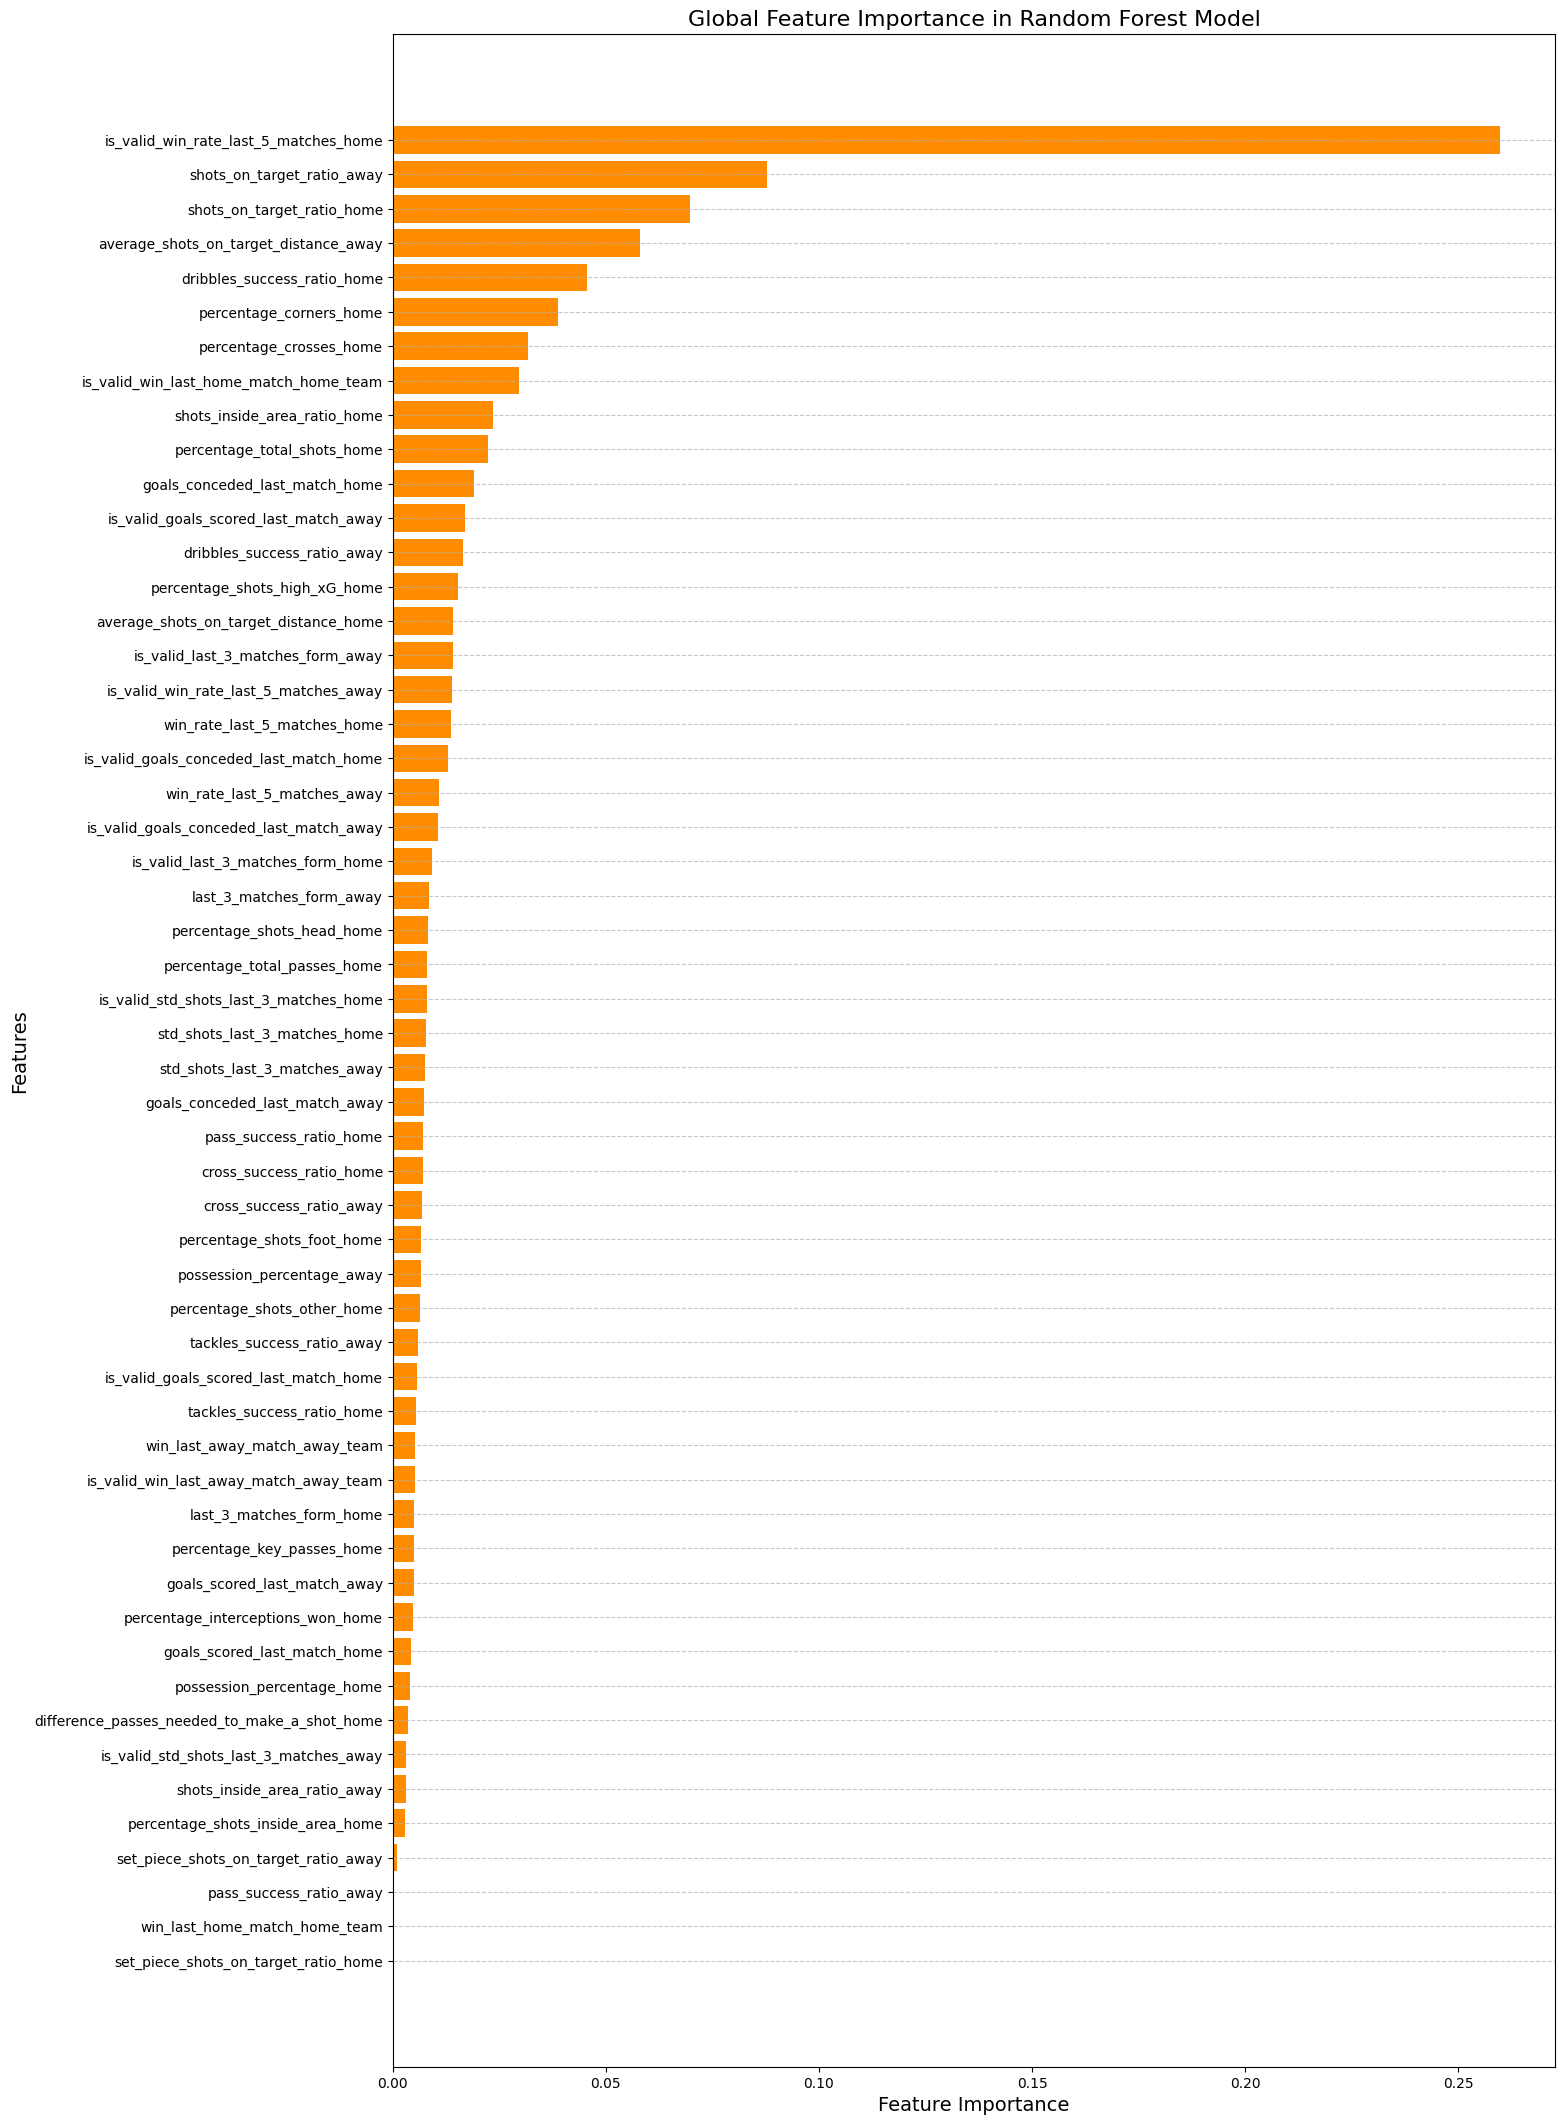

In [4]:
from src.analysis import random_forest_global_analysis

random_forest_global_analysis(best_model_Bundesliga)

El modelo Random Forest ha determinado la relevancia de cada característica en la predicción del resultado de los partidos en la Bundesliga. A diferencia de la Regresión Logística, aquí se mide la importancia relativa de cada variable para el modelo en su conjunto, sin distinguir entre clases específicas (victoria local, empate o victoria visitante). Vamos a analizar el gráfico:

- **Caracterísiticas más importantes en la predicción**: Las características con mayor importancia en el modelo son aquellas que han tenido un impacto significativo en la clasificación del resultado del partido. Aunque no podemos determinar si una variable favorece a un equipo u otro, sí podemos intuir que estas características han sido relevantes en la toma de decisiones del modelo.
    - `is_valid_win_rate_last_5_matches_home`: La validez del rendimiento reciente del equipo local es la característica más influyente en la predicción del modelo. Esto sugiere que la forma en la que el equipo ha jugado en sus últimos cinco partidos ha sido un patrón relevante en la determinación de los resultados.
    - `shots_on_target_ratio_away` y `shots_on_target_ratio_home`: La precisión en los disparos a puerta del equipo local y del visitante son unas de las métricas más destacadas. Esto sugiere que la capacidad del equipo local o visitante para generar tiros precisos ha sido un aspecto clave en los partidos analizados.
    - `average_shots_on_target_distance_home` y `average_shots_on_target_distance_away`: La distancia promedio desde la que el equipo local o visitante realiza sus tiros a puerta también ha sido una variable relevante. Esto podría indicar que los equipos que intentan disparos desde distancias más cortas o largas han mostrado ciertos patrones que el modelo ha identificado como significativos.
    - `dribbles_success_ratio_home`, `dribbles_success_ratio_home`: El éxito en los regates del equipo local ha sido una característica importante. Esto sugiere que la capacidad del equipo para superar defensas mediante el regate ha tenido un impacto en los resultados de los partidos analizados.
    - `percentage_corners_home` y `percentage_crosses_home`: El número de saques de esquina y la frecuencia de centros han sido considerados aspectos relevantes por el modelo. Esto podría indicar que los equipos que generan más jugadas ofensivas desde las bandas han tenido un impacto en la predicción del resultado.
    - `is_valid_win_last_home_match_home_team`: La validez del último partido en casa del equipo local ha sido una variable destacada. Esto sugiere que la forma reciente en su estadio puede estar relacionada con los patrones de victoria o desempeño del equipo.
    - `shots_inside_area_ratio_home`: La proporción de tiros dentro del área del equipo local es otro de los factores importantes en la clasificación del modelo. Los disparos dentro del área suelen estar asociados con una mayor probabilidad de gol, lo que podría explicar su relevancia en la predicción.
    - `percentage_total_shots_home`: El volumen total de disparos del equipo local también ha sido una métrica destacada. Esto sugiere que la cantidad de intentos ofensivos puede estar vinculada a los patrones que el modelo ha identificado como influyentes en los partidos.
    - `goals_conceded_last_match_home`: La cantidad de goles concedidos por el equipo local en su último partido ha sido una característica relevante. Esto podría indicar que la solidez defensiva reciente ha sido un factor tenido en cuenta en la clasificación del modelo.
    - `is_valid_goals_scored_last_match_away`: La validez de los goles anotados por el equipo visitante en su último partido toma importancia en la clasificación del modelo. Esto sugiere que la forma reciente ofensiva del equipo visitante es importantes a la hora de que el modelo tome una decisión.
    - `percentage_shots_high_xG_home`: Los tiros con una alta probabilidad de gol por parte de los equipos es una métrica destacada. Esto sugiere que el porcentaje de anotar goles en los tiros por parte de ambos equipo toma importancia a la hora de tener que clasificar el resultado del partido.
    - `win_rate_last_5_matches_home` y :`win_rate_last_5_matches_away` El rendimiento reciente del equipo local y visitante ha sido identificado como un factor relevante. Esto indica que los resultados obtenidos en los últimos encuentros han tenido una relación con el desenlace de los partidos en la competición.
    - `percentage_shots_head_home`: El porcentaje de tiros de cabeza de los equipos en el partido parece identificarse como una métrica relevante a la hora de tomar una decisión en la clasificación del resultado de partido por parte del modelo.
    - `percentage_total_passes_home`: El porcentaje de pases de ambos equipos en el partido también se considera una métrica relevante para tomar una decisión acerca de la clasificación del resultado del partido por parte del modelo.

- **Características sin importancia en la predicción**: El modelo ha determinado que varias características no aportan información relevante en la clasificación del resultado del partido. Esto no significa que estas variables no tengan influencia en el fútbol en la Bundesliga, sino que, dentro de los datos analizados, el modelo no ha encontrado una relación clara con los resultados.
   - **Factores relacionados con el rendimiento reciente**: Métricas como `win_last_home_match_home_team`, `win_last_away_match_away_team` y `goals_scored_last_match_home` han sido consideradas irrelevantes en la predicción. Esto indica que, aunque el rendimiento pasado de un equipo es un aspecto importante en el análisis futbolístico, el modelo no ha encontrado una relación clara entre estos factores y el resultado final del partido.
    - **Estadísticas defensivas y disciplinares**: 
        - El modelo ha descartado métricas defensivas como `tackles_success_ratio_home`, `tackles_success_ratio_away`, `percentage_recoveries_home` y `percentage_shots_inside_area_under_pressure_home`. Esto sugiere que estos factores no han mostrado una correlación fuerte con los resultados de los partidos en la Bundesliga.
        - Asimismo, métricas relacionadas con la disciplina, como `percentage_red_cards_home`, `percentage_penaltys_committed_home` y `percentage_yellow_cards_home`, no han sido consideradas relevantes en la predicción del modelo. Esto podría indicar que las expulsiones y las faltas, aunque son eventos que pueden cambiar el curso de un partido, no han mostrado un patrón consistente en los datos analizados.
    - **Métricas del estilo de juego**: Es bastante impactante como métricas como `difference_passes_needed_to_make_a_shot_home`, `possession_percentage_home` y `possession_percentage_away` toman tan poca relevancia en la predicción del resultado, siendo métricas que expresan el estilo de juego de los equipos del partido.
    - **Métricas ofensivas**: ALgunas métricas como `shots_inside_area_ratio_away`, `set_piece_shots_on_target_ratio_home`, `set_piece_shots_on_target_ratio_away` o `percentage_shots_inside_area_ratio_home` toman poca importancia a la hora de clasificar el resultado por parte del modelo.
    - **Otros factores tácticos y de juego**: El modelo también ha descartado variables como `percentage_tactical_substitutions_home`, `percentage_pressures_home` y `percentage_passes_under_pressure_home`, lo que sugiere que estos factores tácticos no han sido determinantes en la clasificación del resultado del partido.

**Conclusiones generales**: 

El modelo Random Forest ha identificado que los factores más influyentes en la predicción del resultado en la Bundesliga están relacionados con la eficiencia ofensiva, la generación de oportunidades y el rendimiento reciente de los equipos. En particular, la precisión en los tiros a puerta, el volumen de disparos y la forma reciente del equipo han sido los indicadores clave en la clasificación del resultado del partido.

Por otro lado, aspectos tradicionalmente considerados fundamentales en el análisis futbolístico, como la posesión del balón, los tackles defensivos o la disciplina en el juego, no han mostrado una correlación clara con los resultados. Esto sugiere que en la Bundesliga, la victoria no está necesariamente vinculada a la posesión o la solidez defensiva, sino a la efectividad en la generación y finalización de oportunidades.

El hecho de que métricas relacionadas con el juego por bandas y las jugadas a balón parado hayan sido relevantes sugiere que estas estrategias pueden desempeñar un papel importante en la Bundesliga. Los equipos que logran generar oportunidades a través de centros y saques de esquina parecen haber influido en los resultados de los partidos.

Finalmente, es importante recordar que aunque ciertas características han sido identificadas como más importantes que otras, el modelo no indica en qué dirección afectan el resultado. Es decir, aunque una variable como shots_on_target_ratio_away sea relevante, no podemos determinar si su aumento favorece más a los equipos visitantes o si simplemente es un factor clave en la dinámica de los partidos de la Bundesliga.

En conclusión, este análisis nos proporciona una visión clara de qué aspectos han sido más utilizados en la clasificación de los partidos de la Bundesliga y nos ayuda a comprender mejor cuáles son los patrones más influyentes en la competición, ofreciendo una base sólida para el análisis de partidos en el fútbol alemán.

### Estudio local

Ahora comenzamos el análisis de explicabilidad utilizando SHAP. 

El análisis SHAP (SHapley Additive exPlanations) nos permite interpretar el impacto de cada característica en la predicción del modelo. A diferencia de los coeficientes lineales, SHAP captura interacciones entre variables y muestra el impacto individual de cada una en cada predicción. En este documento analizaremos los resultados obtenidos para la predicción de los partidos de la Bundesliga.

Cada uno de los siguientes gráficos representa la importancia de las variables en la predicción de cada posible resultado:
- Victoria del equipo visitante (away_team).
- Empate (draw).
- Victoria del equipo local (home_team).

**Interpretación de los gráficos SHAP**: Cada punto en el gráfico representa un partido. Los valores en el eje X indican el impacto de una característica específica en la predicción del modelo:
- Valores positivos: Incrementan la probabilidad de que el partido termine con el resultado indicado.
- Valores negativos: Disminuyen la probabilidad del resultado.
- Color: Representa el valor de la característica. Rojo indica valores altos y azul valores bajos.

In [5]:
from src.analysis import compute_shap_values

feature_names_Bundesliga = list(best_model_Bundesliga.feature_names_in_)
shap_values_Bundesliga = compute_shap_values(best_model_Bundesliga, X_train_Bundesliga, X_test_Bundesliga, feature_names_Bundesliga)

Class 0: away_team
Important features (30):
['shots_on_target_ratio_home', 'shots_on_target_ratio_away', 'average_shots_on_target_distance_home', 'average_shots_on_target_distance_away', 'shots_inside_area_ratio_home', 'dribbles_success_ratio_away', 'set_piece_shots_on_target_ratio_home', 'set_piece_shots_on_target_ratio_away', 'last_3_matches_form_away', 'std_shots_last_3_matches_home', 'percentage_total_shots_home', 'percentage_shots_high_xG_home', 'percentage_shots_inside_area_home', 'percentage_total_passes_home', 'difference_passes_needed_to_make_a_shot_home', 'percentage_interceptions_won_home', 'percentage_blocks_home', 'percentage_duels_won_home', 'percentage_tackles_home', 'percentage_clearance_home', 'percentage_key_errors_home', 'percentage_miscontrols_home', 'percentage_yellow_cards_home', 'percentage_pressures_in_attacking_third_home', 'percentage_dribbles_home', 'percentage_dispossessed_home', 'percentage_set_piece_shots_home', 'percentage_substitutions_home', 'percentage

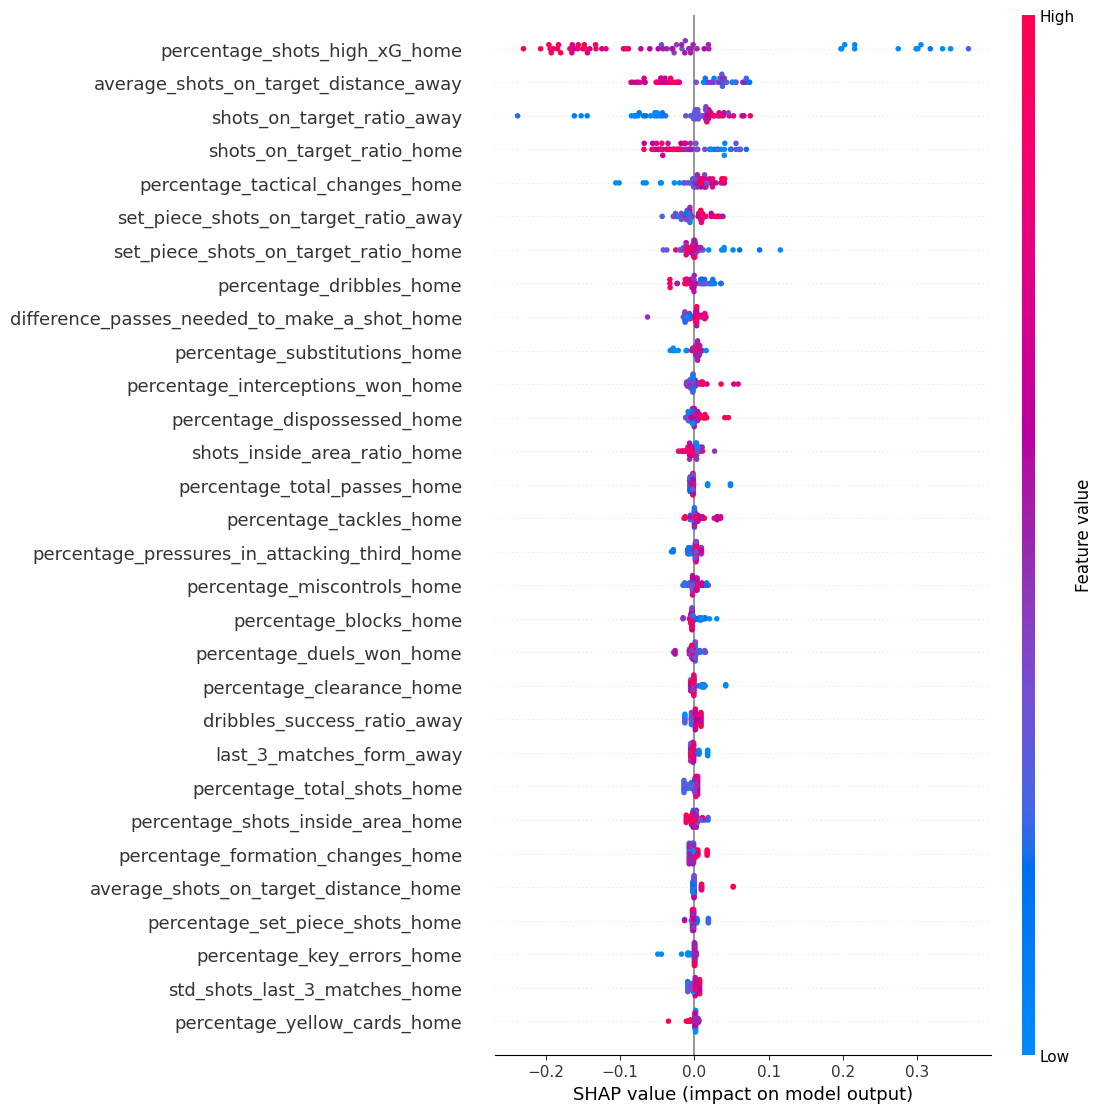

Class 1: draw
Important features (34):
['shots_on_target_ratio_home', 'shots_on_target_ratio_away', 'average_shots_on_target_distance_home', 'average_shots_on_target_distance_away', 'shots_inside_area_ratio_home', 'cross_success_ratio_away', 'dribbles_success_ratio_home', 'dribbles_success_ratio_away', 'set_piece_shots_on_target_ratio_home', 'set_piece_shots_on_target_ratio_away', 'last_3_matches_form_away', 'goals_conceded_last_match_home', 'std_shots_last_3_matches_home', 'std_shots_last_3_matches_away', 'percentage_total_shots_home', 'percentage_shots_high_xG_home', 'percentage_shots_inside_area_home', 'percentage_total_passes_home', 'difference_passes_needed_to_make_a_shot_home', 'percentage_interceptions_won_home', 'percentage_blocks_home', 'percentage_tackles_home', 'percentage_clearance_home', 'percentage_miscontrols_home', 'percentage_pressures_in_attacking_third_home', 'percentage_offsides_home', 'percentage_dribbles_home', 'percentage_dispossessed_home', 'percentage_recoverie

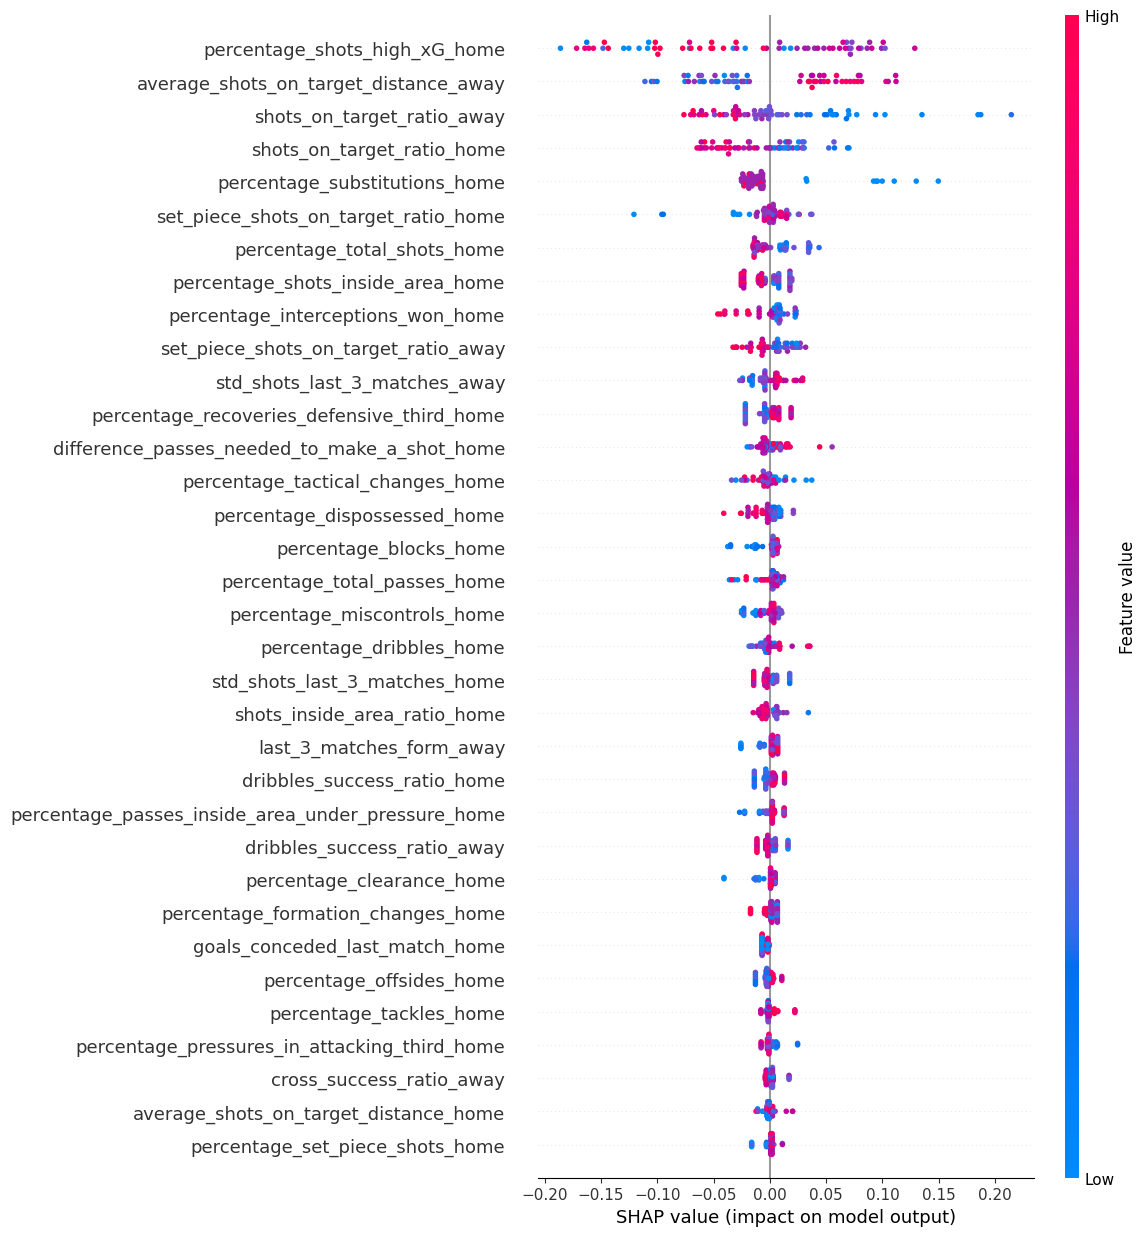

Class 2: home_team
Important features (30):
['shots_on_target_ratio_home', 'shots_on_target_ratio_away', 'average_shots_on_target_distance_home', 'average_shots_on_target_distance_away', 'shots_inside_area_ratio_home', 'dribbles_success_ratio_home', 'set_piece_shots_on_target_ratio_home', 'set_piece_shots_on_target_ratio_away', 'goals_conceded_last_match_home', 'std_shots_last_3_matches_home', 'std_shots_last_3_matches_away', 'percentage_total_shots_home', 'percentage_shots_high_xG_home', 'percentage_shots_inside_area_home', 'percentage_total_passes_home', 'difference_passes_needed_to_make_a_shot_home', 'percentage_interceptions_won_home', 'percentage_blocks_home', 'percentage_duels_won_home', 'percentage_tackles_home', 'percentage_miscontrols_home', 'percentage_yellow_cards_home', 'percentage_counterpress_home', 'percentage_offsides_home', 'percentage_dribbles_home', 'percentage_dispossessed_home', 'percentage_recoveries_defensive_third_home', 'percentage_passes_inside_area_under_pres

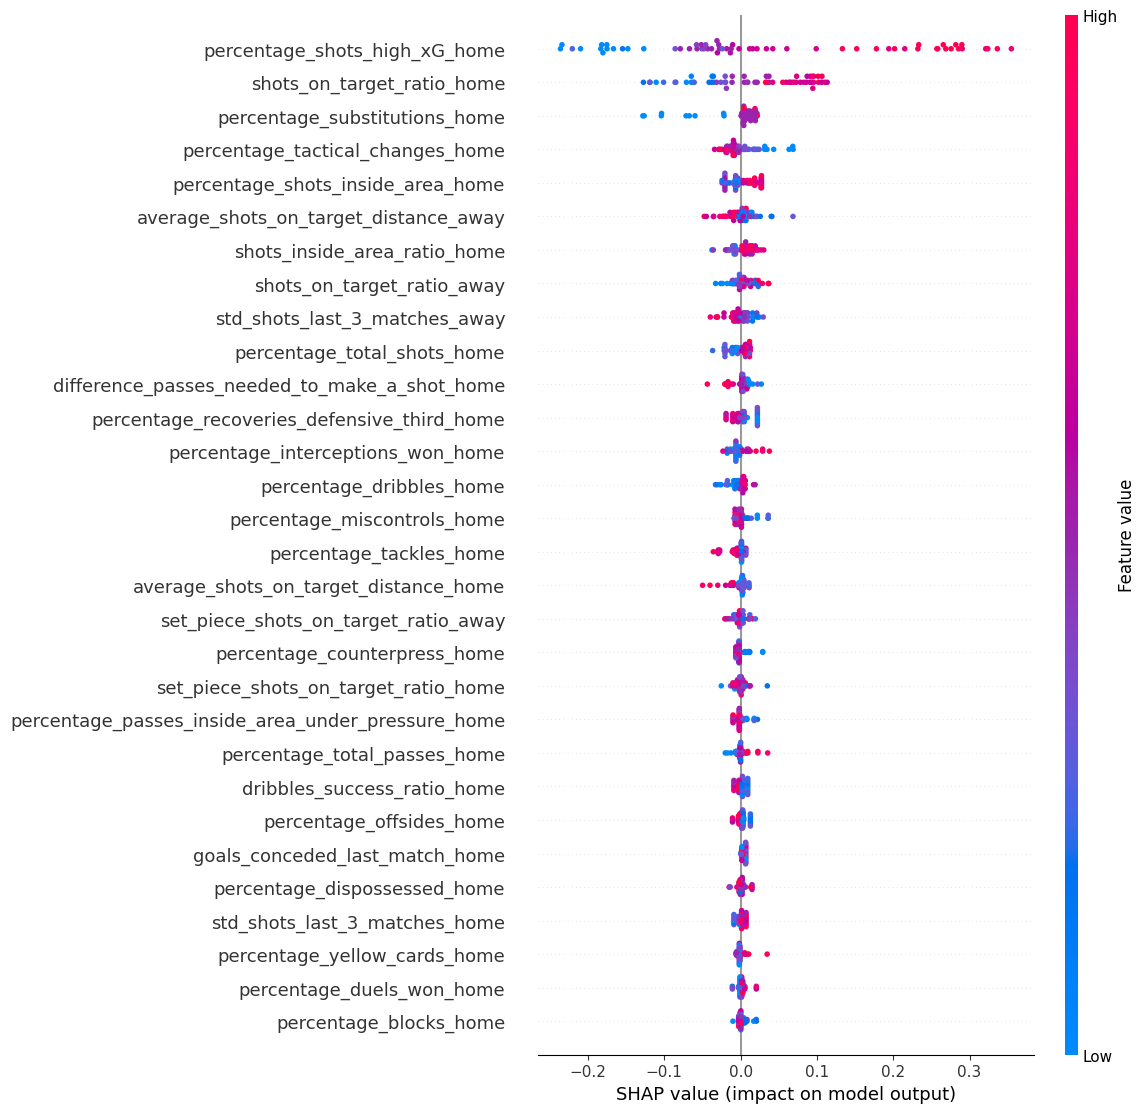

In [6]:
from src.analysis import plot_shap_summary

plot_shap_summary(shap_values_Bundesliga, feature_names_Bundesliga, encoder_Bundesliga, threshold=0.003)

Vamos a analizar cada uno de los gráficos:

- **Victoria del equipo visitante**: Este gráfico muestra las características que favorecen o disminuyen la probabilidad de victoria del equipo visitante en la Bundesliga.
    - **Características que favorecen la victoria del equipo visitante**: 📈
        - `shots_on_target_ratio_away`: Un equipo visitante con un alto porcentaje de tiros a puerta indica que es más efectivo en ataque, lo que aumenta sus posibilidades de anotar y ganar el partido.
        - `percentage_tactical_changes_home`: Si el equipo local hace muchas modificaciones tácticas, puede ser una señal de que está siendo superado, beneficiando al equipo visitante.
        - `set_piece_shots_on_target_ratio_away`: Si el equipo visitante tiene una alta precisión en tiros a balón parado, puede aprovechar estas situaciones para marcar goles clave.
        - `difference_passes_needed_to_make_a_shot_home`: Si el equipo local necesita más pases para generar un disparo, su ataque es menos directo y menos efectivo en comparación con el visitante.
        - `percentage_interceptions_won_home`: Si el equipo local tiene un número alto de intercepciones, puede significar que está recuperando el balón en zonas no ofensivas, sin generar suficiente peligro.
        - `percentage_dispossessed_home`: Si el equipo local pierde la posesión con frecuencia, le otorga más oportunidades de ataque al visitante.
        - `dribbles_success_ratio_away`: Un equipo visitante con mayor éxito en regates indica que es capaz de romper líneas defensivas y generar oportunidades de gol.
        - `percentage_formation_changes_home`: Si el equipo local cambia más veces de formación que el equipo visitante puede indicar que esta viéndose superado y que quiere cambiar la dinámica del partido lo que aumentan las opciones de que gane el equipo visitante.
        - `average_shots_on_target_distance_home`: Si el equipo local realiza sus tiros desde lejos, disminuye la calidad de sus oportunidades, favoreciendo al equipo visitante.
    - **Características que no favorecen la victoria del equipo visitante**: 📉
        - `percentage_shots_high_xG_home`: Si el equipo local genera muchas oportunidades de alta expectativa de gol (xG), es más probable que convierta y haga difícil la victoria visitante.
        - `average_shots_on_target_distance_away`: Si el equipo visitante realiza sus tiros desde lejos, disminuye la calidad de sus oportunidades, desfavoreciendo las opciones de que el equipo visitante gane el partido.
        - `shots_on_target_ratio_home`: Un equipo local con una alta precisión en tiros a puerta genera más peligro y reduce las opciones de victoria del visitante.
        - `set_piece_shots_on_target_ratio_home`: Si el equipo local es efectivo en jugadas a balón parado, puede generar peligro y reducir las opciones del visitante de ganar.
        - `percentage_dribbles_home`: Si el equipo local intenta más regates que el equipo visitante indica que esta atacando más e intentando superar la línea defensiva del equipo visitante, dismunyendo así las opciones de ganar del equipo visitante.
        - `shots_inside_area_ratio_home`: Un equipo local que dispara con frecuencia dentro del área tiene más posibilidades de anotar, dificultando el triunfo visitante.
        - `percentage_clearance_home`: Un equipo local que realiza muchos despejes efectivos impide que el equipo visitante tenga oportunidades de finalizar jugadas en ataque.
        - `percentage_blocks_home`: Si el equipo local bloquea muchos tiros, está reduciendo la efectividad ofensiva del visitante.
        - `percentage_shots_inside_area_home`: Si el equipo local realiza más tiros que el equipo visitante desde dentro del área en el partido, disminuyen las opciones del equipo visitante de ganar el partido.
    - **Conclusión**: La victoria del equipo visitante en la Bundesliga está influenciada principalmente por su efectividad ofensiva y la inestabilidad del equipo local. Un equipo visitante con un alto porcentaje de tiros a puerta, precisión en jugadas a balón parado y éxito en regates tiene mayores probabilidades de imponerse. Además, si el equipo local realiza constantes cambios tácticos o de formación, pierde la posesión con frecuencia y necesita demasiados pases para generar oportunidades de gol, la ventaja se inclina hacia el equipo visitante. Sin embargo, la victoria visitante se ve amenazada cuando el equipo local es eficaz en la finalización, especialmente cuando genera oportunidades de alta expectativa de gol (xG), dispara con frecuencia dentro del área y tiene precisión en sus tiros a balón parado. Además, si el equipo local es sólido en defensa, bloquea tiros y despeja con éxito, complica las opciones del visitante de convertir goles. También, si el visitante realiza sus disparos desde lejos, la calidad de sus oportunidades disminuye y su probabilidad de ganar se reduce.

- **Empate**: Este gráfico muestra las características que favorecen o disminuyen la probabilidad de empate en un partido en la Bundesliga. El empate en un partido se ve influenciado por el equilibrio entre ambos equipos en aspectos ofensivos, defensivos y de control del juego.
    - **Características que favorecen el empate**: 📈
        - `percentage_shots_high_xG_home`: Cuando el procentaje de tiros con alta probabilidad de gol es un valor cercano al 50%, aumentan las opciones de empate ya que los valores extremos significan que uno de los dos equipos ha tenido más tiros de este estilo mientras que si es un valor cercano al 50% indica igualdad en este tipo de tiros.
        - `average_shots_on_target_distance_away`: Si el equipo visitante realiza sus tiros desde lejos, disminuye la calidad de sus oportunidades, favoreciendo el empate.
        - `std_shots_last_3_matches_away`: Si el equipo visitante tiene una desviación alta de tiros en los últimos tres partido significa que no viene teniendo un rendimineto regular lo que hace aumentar las opciones de que el partido quede en empate.
        - `percentage_recoveries_defensive_third_home`: Si el equipo local recupera muchos balones en su propio tercio, significa que su defensa está funcionando bien y evita que el equipo visitante genere muchas ocasiones claras.
        - `percentage_blocks_home`: Un equipo local que bloquea muchos tiros reduce la efectividad ofensiva del equipo visitante, dificultando la posibilidad de que uno de los dos equipos se imponga.
        - `percentage_miscontrols_home`: Si el equipo local tiene un número elevado de errores en el control del balón, puede significar un partido con muchas pérdidas de posesión, sin un dominio claro de ningún equipo.
        - `last_3_matches_form_away`: Si el equipo visitante no viene con una mala forma de los 3 partidos pasados hace que pueda reaccionar en el partido si se ve por dentrás aumentando así sus opciones de empatar el partido.
        - `percentage_clearance_home`: Si el equipo local realiza un alto número de despejes, puede estar evitando situaciones de peligro en su área, lo que impide que el equipo visitante marque y mantiene el marcador equilibrado.
        - `percentage_tackles_home`: Si el equipo rival realiza más tackles que el equipo visitante, puede estar evitando que el equipo visitante imponga su juego lo que hace que el marcador se mantenga equilibrado.
    - **Características que no favorecen el empate**: 📉
        - `percentage_shots_high_xG_home`: Si el equipo local o visitante genera disparos con alta expectativa de gol (xG), es más probable que convierta sus oportunidades y rompa el empate.
        - `shots_on_target_ratio_home` y `shots_on_target_ratio_away`: Un equipo con un alto porcentaje de tiros a puerta está generando más peligro y tiene más probabilidades de marcar, reduciendo la posibilidad de un empate.
        - `percentage_substitutions_home`: Un equipo local que realiza varias sustituciones puede deberse a que quiere mantener el ritmo del partido, desfavoreciendo de esta manera el empate.
        - `percentage_total_shots_home`: Si el equipo local tiene un alto porcentaje de tiros a puerta aumentan sus opciones de ganar el partido, disminuyendo así las opciones de empate.
        - `percentage_shots_inside_area_home`: Si el equipo local realiza muchos tiros desde dentro del área, disminuyen las opciones de empate.
        - `percentage_interceptions_won_home_team`: Si el equipo local gana varios balones a partir de intercepciones hace indicar su buen nivel defensivo en el partido, aumentando así sus opciones de imponer si juego y ganar el partido.
        - `set_piece_shots_on_target_ratio_away`: Si el equipo visitante tiene una alta precisión en tiros a balón parado, puede aprovechar estas situaciones para marcar goles claves, reduciendo así las opciones de empate.
        - `percentage_dispossessed_home`: Si el equipo local pierde la posesión con frecuencia, le otorga más oportunidades de ataque al visitante.
        - `shots_inside_area_ratio_home`: Si el equipo local realiza gran parte de sus tiros desde dentro del área, disminuyen las opciones de que ocurra un empate en el partido.
        - `dribbles_success_ratio_away`: Un equipo visitante con mayor éxito en regates indica que es capaz de romper líneas defensivas y generar oportunidades de gol.
        - `percentage_formation_changes_home`: Si el equipo local cambia más veces de formación que el equipo visitante puede indicar que esta viéndose superado y que quiere cambiar la dinámica del partido lo que aumentan las opciones de que gane el equipo visitante.
    - **Conclusión**: El empate en la Bundesliga se ve favorecido cuando ambos equipos muestran un equilibrio en su desempeño, sin una dominancia clara en el ataque o la defensa. Factores como una distribución equilibrada de los tiros con alta expectativa de gol, la recuperación efectiva del balón en zonas defensivas y la cantidad de despejes y bloqueos del equipo local contribuyen a un partido con menos goles y más propenso a terminar en empate. Además, cuando el equipo visitante no tiene un rendimiento constante en los últimos partidos o cuando el equipo local comete errores en el control del balón, la posibilidad de que el partido se mantenga parejo aumenta. Por otro lado, el empate se vuelve menos probable cuando uno de los equipos genera más peligro en ataque. Un alto porcentaje de tiros a puerta, una alta efectividad en jugadas a balón parado y una mayor cantidad de tiros dentro del área aumentan las probabilidades de que uno de los equipos se imponga en el marcador. Además, si el equipo local realiza muchas sustituciones o cambios de formación, puede indicar que está intentando revertir una situación adversa, lo que puede llevar a un desenlace más inclinado hacia una victoria.

- **Victoria del equipo local**: Este gráfico muestra las características que favorecen o disminuyen la probabilidad de victoria del equipo local en la Bundesliga.
    - **Características que favorecen la victoria del equipo local**: 📈
        - `percentage_shots_high_xG_home`: Si los tiros del equipo local tienen un alto "expected goal" (xG), significa que está generando oportunidades de alta calidad, lo que incrementa sus posibilidades de marcar.
        - `shots_on_target_ratio_home`: Un alto porcentaje de tiros a puerta del equipo local indica que está generando ocasiones claras de gol y aumenta sus probabilidades de anotar y ganar el partido.
        - `percentage_substitutions_home`: Un equipo local que realiza varias sustituciones puede deberse a que quiere mantener el ritmo del partido, favoreciendo de esta manera su victoria.
        - `shots_inside_area_ratio_home` y `percentage_shots_inside_area_home`: Un equipo local que dispara con frecuencia dentro del área genera ocasiones más peligrosas y tiene más probabilidades de convertir goles.
        - `percentage_interceptions_won_home`: Un equipo local que gana más intercepciones está cortando los ataques rivales y evitando que el visitante progrese con facilidad.
        - `percentage_dribbles_home`: Si el equipo local intenta más regates que el equipo visitante indica que esta atacando más e intentando superar la línea defensiva del equipo visitante, aumentando así las opciones de ganar del equipo local.
        - `percentage_total_passes_home`: Si el equipo local realiza más pases que el equipo rival aumentando sus opciones de ganar el partido ya que indica que lleva el control del partido.
        - `percentage_duels_won_home`: Un equipo que gana más duelos físicos en el partido demuestra superioridad en el aspecto físico y en la lucha por la posesión, lo que suele traducirse en un mejor control del juego.
    - **Características que no favorecen la victoria del equipo local**: 📉
        - `percentage_tactical_changes_home`: Si el equipo local hace muchas modificaciones tácticas, puede ser una señal de que está siendo superado, beneficiando al equipo visitante.
        - `shots_on_target_ratio_away`: Si el equipo visitante tiene un alto porcentaje de tiros a puerta, significa que está generando peligro y reduciendo las opciones del equipo local de ganar el partido.
        - `std_shots_last_3_matches_away`: Si el equipo visitante tiene una desviación alta de tiros en los últimos tres partido significa que no viene teniendo un rendimineto regular lo que hace aumentar las opciones de que el partido quede en empate.
        - `difference_passes_needed_to_make_a_shot_home`: Si el equipo local necesita más pases para generar un disparo, su ataque es menos directo y menos efectivo en comparación con el visitante.
        - `average_shots_on_target_distance_home`: Si el equipo local realiza sus tiros desde lejos, disminuye la calidad de sus oportunidades y así sus opciones de ganar el partido.
        - `percentage_miscontrols_home`: Si el equipo local tiene un número elevado de errores en el control del balón, puede significar un partido con muchas pérdidas de posesión, sin un dominio claro de ningún equipo.
        - `percentage_offsides_home`: Si el equipo local cae mucho en fuera de juego puede indicar que no esta sabiendo como atacar al equipo rival haciendo de esta manera que disminuyan sus opciones de ganar el partido.
    - **Conclusión**: La victoria del equipo local en la Bundesliga está determinada por una combinación de factores ofensivos, defensivos y de control del partido. Un equipo que genera oportunidades de alta calidad, con tiros dentro del área y una alta tasa de tiros a puerta, tiene mayores probabilidades de imponerse en el marcador. Además, un equipo local que domina en la posesión del balón, gana más duelos físicos e intercepta los ataques rivales muestra una superioridad en el juego que suele traducirse en un mejor rendimiento. Factores como los regates exitosos y las sustituciones estratégicas pueden indicar un equipo ofensivamente activo y con capacidad de adaptación a las necesidades del partido. Sin embargo, ciertas variables pueden reducir las opciones de victoria del equipo local. Un equipo que necesita demasiados pases para generar un disparo tiende a ser menos directo y eficiente en ataque, lo que favorece a su rival. Además, un equipo que realiza muchos cambios tácticos puede estar mostrando inseguridad en su planteamiento, algo que el equipo visitante podría aprovechar. Otros factores como la alta efectividad en los tiros del equipo visitante, errores en el control del balón y una frecuencia elevada de fueras de juego también pueden indicar debilidades que dificultan la victoria del equipo local.

- **Conclusiones generales**:
    - *Victoria del equipo visitante*: La victoria del equipo visitante en la Bundesliga está influenciada principalmente por su capacidad ofensiva y la inestabilidad táctica del equipo local. Equipos visitantes con alta efectividad en sus tiros, éxito en regates y precisión en jugadas a balón parado tienen una ventaja considerable. Además, si el equipo local realiza cambios tácticos frecuentes, pierde la posesión con facilidad o necesita demasiados pases para generar peligro, el visitante tiene más posibilidades de imponerse. Sin embargo, si el equipo local es sólido en defensa, bloquea tiros y genera oportunidades de alta expectativa de gol (xG), la victoria visitante se complica, especialmente si el equipo visitante depende de tiros lejanos, que reducen la calidad de sus oportunidades.
    - *Empate*: El empate en la Bundesliga se da en situaciones donde ninguno de los equipos logra imponerse claramente, ya sea en el aspecto ofensivo o defensivo. Factores como la distribución equitativa de tiros con alta expectativa de gol, la capacidad del equipo local para recuperar balones en zonas defensivas y una gran cantidad de despejes y bloqueos hacen que el partido tenga menos oportunidades de goles y termine en empate. Además, cuando el equipo visitante ha sido irregular en sus últimos partidos o el equipo local comete errores en el control del balón, la probabilidad de un resultado igualado aumenta. No obstante, el empate es menos probable cuando un equipo genera más peligro con tiros a puerta precisos, tiene éxito en jugadas a balón parado o domina la posesión con efectividad.
    - *Victoria del equipo local*: La victoria del equipo local se construye sobre una combinación de ataque efectivo, dominio del juego y solidez defensiva. Un equipo local que genera muchas oportunidades de calidad dentro del área, con alta precisión en los tiros y control del balón, tiene más probabilidades de ganar. La superioridad en duelos físicos, la precisión en regates y la capacidad para interceptar los ataques rivales también son claves para imponerse en el partido. Sin embargo, si el equipo local presenta debilidades como falta de efectividad en el ataque, una dependencia excesiva de cambios tácticos o una alta cantidad de fueras de juego y errores en el control del balón, su probabilidad de victoria disminuye. Además, si el equipo visitante logra generar ocasiones peligrosas y tiene una defensa organizada, la ventaja del equipo local puede verse reducida.
    - *Factores no determinantes*: Existen factores que no son completamente determinantes para definir el resultado del partido, ya que su impacto puede depender de la situación específica de cada encuentro. Por ejemplo, el número de pases realizados por un equipo puede indicar control del juego, pero si no se traduce en oportunidades claras, no garantiza una victoria. De igual manera, la cantidad de tiros realizados no siempre es un indicador de éxito si estos son de baja calidad. Otro aspecto es la cantidad de faltas o tarjetas, que pueden afectar el rendimiento de un equipo, pero no siempre influyen de manera directa en el marcador final. En general, es el equilibrio entre ataque, defensa y toma de decisiones tácticas lo que finalmente define el resultado del partido en la Bundesliga.